In [8]:
test_input_path ='filter_adding_to_medical_image/input/normal-brain-mri-42.png'

In [9]:
!python filter_adding_to_medical_image -i {test_input_path} -o output

Going to initiate execution of operator SobelOperator
Executing operator SobelOperator (Process ID: 32604, Operator ID: ee718137-5347-4dc1-a449-b4d072d8b266)
Done performing execution of operator SobelOperator

Going to initiate execution of operator MedianOperator
Executing operator MedianOperator (Process ID: 32604, Operator ID: 19da655f-9da8-47ab-a526-1393c91f37ec)
Done performing execution of operator MedianOperator

Going to initiate execution of operator GaussianOperator
Executing operator GaussianOperator (Process ID: 32604, Operator ID: b9326a2d-3343-4919-9833-f8e38362e16d)
Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
[2022-06-04 12:54:54,853] [WARNING] (imageio) - Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Done performing execution of operator GaussianOperator



In [16]:
!monai-deploy exec filter_adding_to_medical_image -i {test_input_path} -o output

Going to initiate execution of operator SobelOperator
Executing operator SobelOperator (Process ID: 12242, Operator ID: 6c88fb2c-950f-4647-8581-ac38bb9945ca)
Done performing execution of operator SobelOperator

Going to initiate execution of operator MedianOperator
Executing operator MedianOperator (Process ID: 12242, Operator ID: c0ed3a66-bc6f-4a81-85f0-3dcc45818116)
Done performing execution of operator MedianOperator

Going to initiate execution of operator GaussianOperator
Executing operator GaussianOperator (Process ID: 12242, Operator ID: e3799d03-6896-40d3-b179-14050e24e387)
Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
[2022-06-04 13:06:27,693] [WARNING] (imageio) - Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Done performing execution of operator GaussianOperator



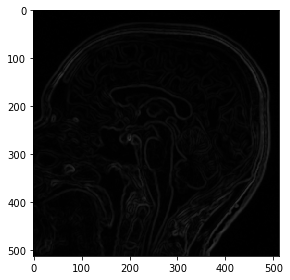

In [17]:
from skimage import io
output_image = io.imread("output/final_output.png")
io.imshow(output_image)

In [19]:
!monai-deploy package filter_adding_to_medical_image --tag filter_adding_to_medical_image1:latest  # -l DEBUG

Building MONAI Application Package... Done
[2022-06-04 13:12:16,596] [INFO] (app_packager) - Successfully built filter_adding_to_medical_image1:latest


In [20]:
!docker image ls | grep filter_adding_to_medical_image1

filter_adding_to_medical_image1   latest          902afffdaca4   37 seconds ago   15.5GB


In [21]:
!mkdir -p input && rm -rf input/*
!cp {test_input_path} input/

# Launch the app
!monai-deploy run filter_adding_to_medical_image1:latest input output

Checking dependencies...
--> Verifying if "docker" is installed...

--> Verifying if "filter_adding_to_medical_image1:latest" is available...

Checking for MAP "filter_adding_to_medical_image1:latest" locally
"filter_adding_to_medical_image1:latest" found.

Reading MONAI App Package manifest...
Going to initiate execution of operator SobelOperator
Executing operator SobelOperator (Process ID: 1, Operator ID: 717bbfcd-2a01-4e82-a420-338640e9f1e8)
[2022-06-04 11:13:39,466] [INFO] (matplotlib.font_manager) - generated new fontManager
Done performing execution of operator SobelOperator

Going to initiate execution of operator MedianOperator
Executing operator MedianOperator (Process ID: 1, Operator ID: dfa3f197-caf3-4e34-95c1-70f399fa3ecd)
Done performing execution of operator MedianOperator

Going to initiate execution of operator GaussianOperator
Executing operator GaussianOperator (Process ID: 1, Operator ID: 33599530-033b-415e-81a4-3b46e1128c7c)
/root/.local/lib/python3.8/site-packages

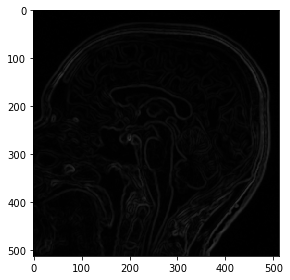

In [22]:
output_image = io.imread("output/final_output.png")
io.imshow(output_image)